In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/marketing_campaign.csv", sep = '\t')
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<Axes: >

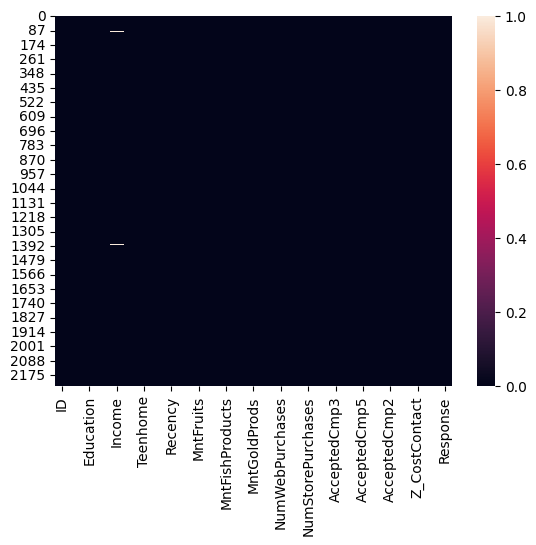

In [ ]:
sns.heatmap(data.isnull())


In [ ]:
# We found some null values in the 'Income' column

data.Income = data.Income.fillna(0)


<Axes: >

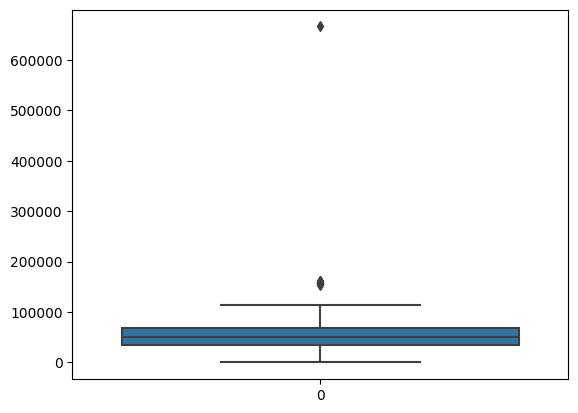

In [ ]:
# Checking for outliers

sns.boxplot(data.Income)


In [ ]:
data[(data.Income > data.Income.quantile(0.05)) | (data.Income < data.Income.quantile(0.95))]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
data['z_score'] = data['Income']
data.head(2)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,z_score
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,58138.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,46344.0


In [ ]:
data.z_score = (data.Income - data.Income.mean()) / data.Income.std()
data[['z_score']]


,z_score
0,0.251882
1,-0.208653
2,0.778057
3,-0.977825
4,0.257935
...,...
2235,0.372346
2236,0.481330
2237,0.206703
2238,0.685591


In [ ]:
data[(data.z_score>-3|(data.z_score<3))]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,z_score
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,0,0,1,1,0,0,3,11,1,1.214890
29,1966,1965,PhD,Married,84618.0,0,0,22-11-2013,96,684,...,0,0,1,0,0,0,3,11,0,1.285880
40,8601,1980,Graduation,Married,80011.0,0,1,29-04-2013,3,421,...,0,0,0,0,0,0,3,11,0,1.105985
45,1371,1976,Graduation,Single,79941.0,0,0,28-06-2014,72,123,...,0,0,0,0,0,0,3,11,0,1.103251
51,4114,1964,Master,Married,79143.0,0,0,11-08-2012,2,650,...,0,0,0,0,0,0,3,11,0,1.072091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,8722,1957,2n Cycle,Married,82347.0,0,0,06-11-2012,38,556,...,1,0,0,1,0,0,3,11,1,1.197201
2211,10469,1981,Graduation,Together,88325.0,0,0,05-02-2014,42,519,...,0,0,0,0,0,0,3,11,0,1.430632
2213,3661,1995,2n Cycle,Single,80617.0,0,0,12-10-2012,42,594,...,0,0,0,0,0,0,3,11,0,1.129648
2217,9589,1948,PhD,Widow,82032.0,0,0,05-04-2014,54,332,...,0,0,0,0,0,0,3,11,0,1.184901


In [ ]:
data[data.Income > data.Income.mean() + 3 * data.Income.std()]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,z_score
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,3,11,0,4.121759
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,0,0,0,0,0,0,3,11,0,4.323014
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,3,11,0,3.992158
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,3,11,0,4.260771
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,0,0,0,0,0,0,3,11,0,4.140893
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,0,0,0,0,0,0,3,11,0,4.117971
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,3,11,0,4.109303
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,0,0,0,0,0,0,3,11,0,24.013835


In [ ]:
data.drop(columns = 'ID', inplace = True)


In [ ]:
# Checking again for nulls

data.isnull().sum()


Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
z_score                0
dtype: int64

In [ ]:
# Converting column to datetime

data.Dt_Customer = pd.to_datetime(data.Dt_Customer, dayfirst = False)

data[['month']] = pd.DataFrame(data.Dt_Customer.dt.month)
data[['day']] = pd.DataFrame(data.Dt_Customer.dt.day)
data[['year']] = pd.DataFrame(data.Dt_Customer.dt.year)


<ipython-input-18-caa05dd0c6ba>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.Dt_Customer = pd.to_datetime(data.Dt_Customer, dayfirst = False)


In [ ]:
data.drop(columns = 'Dt_Customer',inplace = True)


In [ ]:
data.shape


(2240, 31)

In [ ]:
data.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,z_score,month,day,year
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,3,11,1,0.251882,4,9,2012
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,3,11,0,-0.208653,8,3,2014
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,3,11,0,0.778057,8,21,2013
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,3,11,0,-0.977825,10,2,2014
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,3,11,0,0.257935,1,19,2014


In [ ]:
x = data.iloc[:, 0:29]
x = data.drop(columns = ['Response', 'z_score'])
print(x)


      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp4  \
0          58       635  

In [ ]:
y = data['Response']


In [ ]:
x.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
month                    int64
day                      int64
year                     int64
dtype: object

In [ ]:
x.iloc[:, 1]


0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: object

In [ ]:
nom_col= [1,2]
numeric_col = [0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler           #KBinsDiscretizer,Binarizer
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans = make_column_transformer((OneHotEncoder(sparse = False),nom_col),
                                (StandardScaler(),numeric_col),
                                 remainder = 'passthrough')
set_config(display = 'diagram')
trans


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [1, 2]),
                                ('standardscaler', StandardScaler(),
                                 [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                  15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                  26, 27, 28])])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 42)


In [ ]:
x_train.shape


(1568, 29)

In [ ]:
y_train.shape

(1568,)

In [ ]:
y_test.shape


(672,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


from sklearn.pipeline import make_pipeline
pipe_dt = make_pipeline(trans, dt)
pipe_dt


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
pipe_dt.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
pred = pipe_dt.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test) * 100


84.375

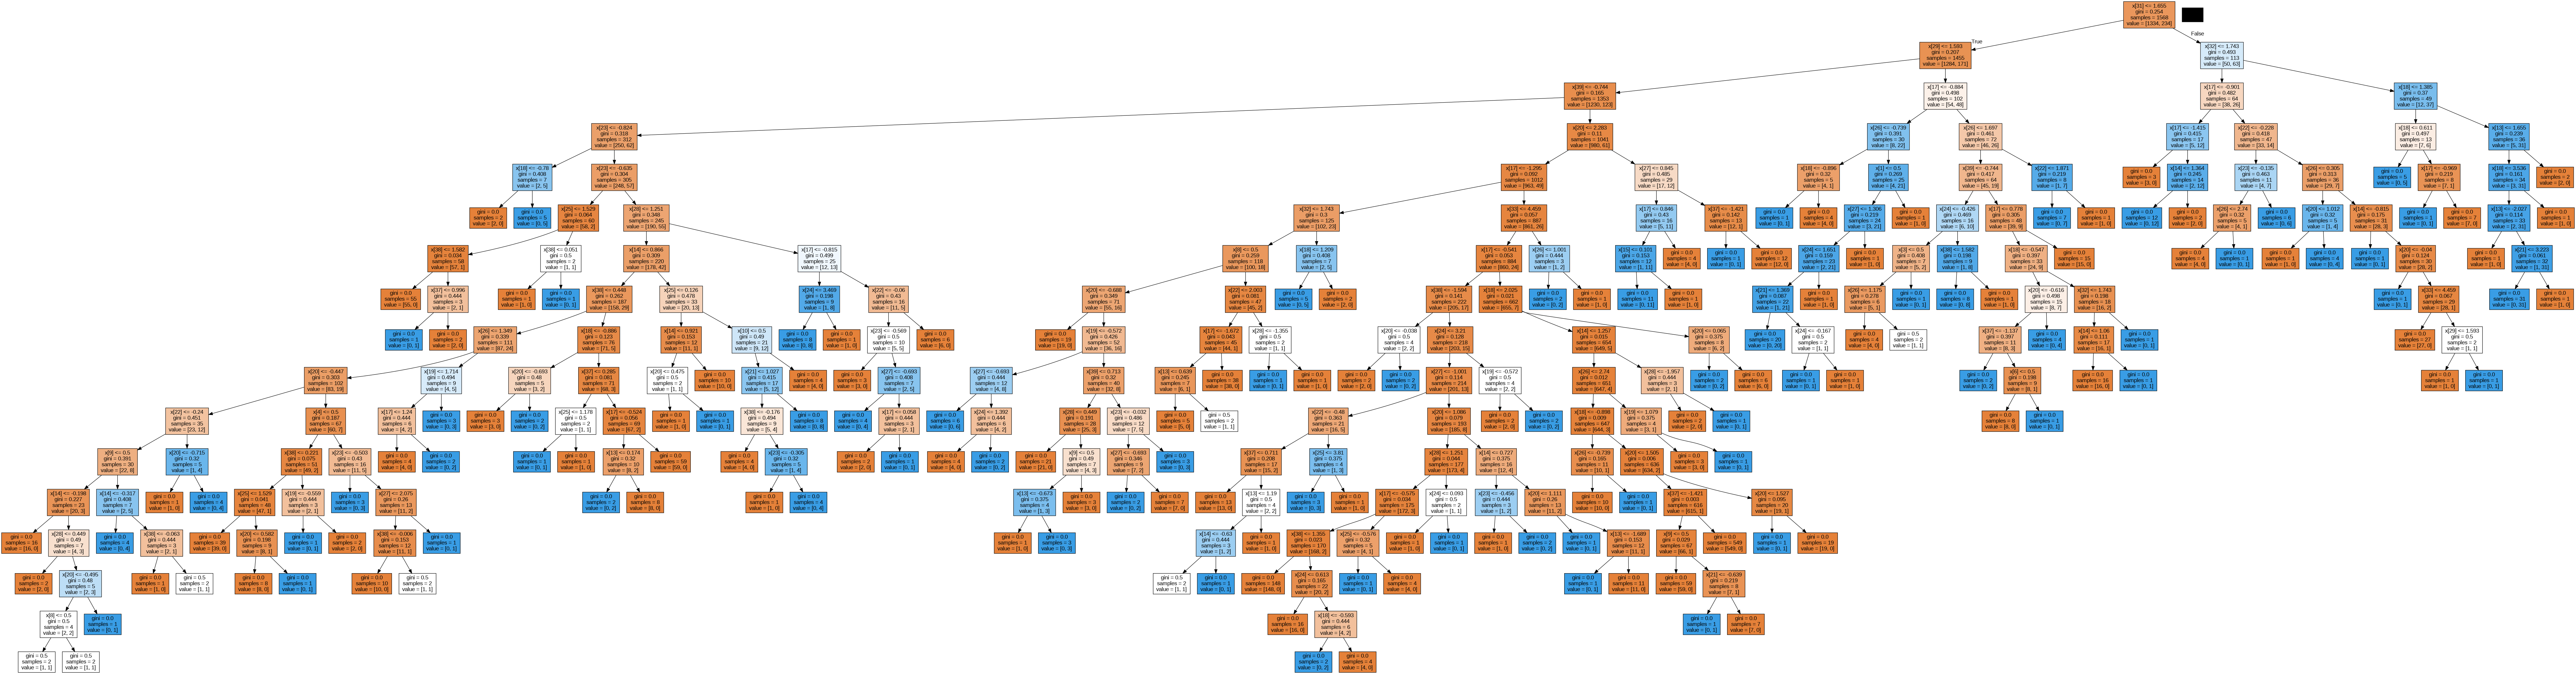

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

feature = list(data.columns).remove('Response')

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, feature_names = feature, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())
